## Feature Selection-Information gain - mutual information In Classification Problem Statements

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X = df.drop(labels=['Wine'],axis = 1) #independent var
y = df['Wine'] #dependent var
X_train,X_test,y_train,y_test=train_test_split(X, #INDEPENDENDENT VARIABLE
    y, #wine as DEPENDENT VARIABLE
    test_size=0.3, #70% TRAINING DS AND 30% TEST DATA
    random_state=0)

In [8]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [9]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info #impactful variable will get high value and less impactfull will get low values

array([0.41523709, 0.3129633 , 0.17090786, 0.2748969 , 0.1586331 ,
       0.46038067, 0.72458049, 0.12128522, 0.27827297, 0.62002013,
       0.53402198, 0.55116078, 0.53267576])

In [10]:
mutual_info = pd.Series(mutual_info)


In [11]:
mutual_info

0     0.415237
1     0.312963
2     0.170908
3     0.274897
4     0.158633
5     0.460381
6     0.724580
7     0.121285
8     0.278273
9     0.620020
10    0.534022
11    0.551161
12    0.532676
dtype: float64

In [12]:
mutual_info.index = X_train.columns


In [13]:
mutual_info

Alcohol                 0.415237
Malic.acid              0.312963
Ash                     0.170908
Acl                     0.274897
Mg                      0.158633
Phenols                 0.460381
Flavanoids              0.724580
Nonflavanoid.phenols    0.121285
Proanth                 0.278273
Color.int               0.620020
Hue                     0.534022
OD                      0.551161
Proline                 0.532676
dtype: float64

In [14]:
mutual_info.sort_values(ascending=False)

Flavanoids              0.724580
Color.int               0.620020
OD                      0.551161
Hue                     0.534022
Proline                 0.532676
Phenols                 0.460381
Alcohol                 0.415237
Malic.acid              0.312963
Proanth                 0.278273
Acl                     0.274897
Ash                     0.170908
Mg                      0.158633
Nonflavanoid.phenols    0.121285
dtype: float64

<AxesSubplot:>

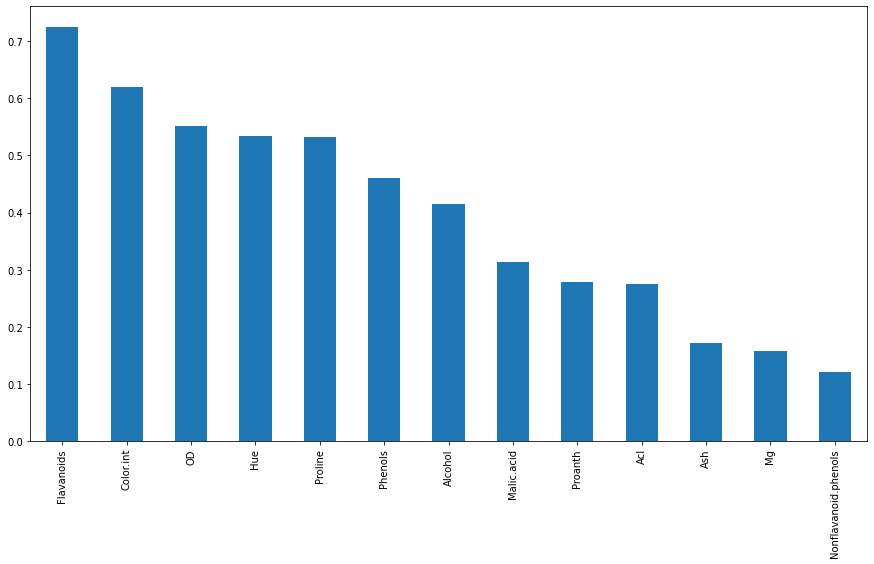

In [15]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)


In [19]:
sel_five_cols.fit(X_train, y_train)#wine is output variable


SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000021C75E8A5E0>)

In [20]:
sel_five_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [21]:
X_train.columns[sel_five_cols.get_support()==True]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')